In [29]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

# Pretty display for notebooks
%matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [2]:
sales = pd.read_csv('Data/home_data.csv')
display(sales.head())


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
sales = sales.replace('?', np.nan)
sales = sales.dropna()
sales['date'] = pd.to_datetime(sales['date'], format='%Y%m%dT%H%M%S')
display(sales.head())
print(sales.dtypes)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


id                        int64
date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


In [4]:
col_names = list(sales)
print("col_names: \n{}".format(col_names))


col_names: 
['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


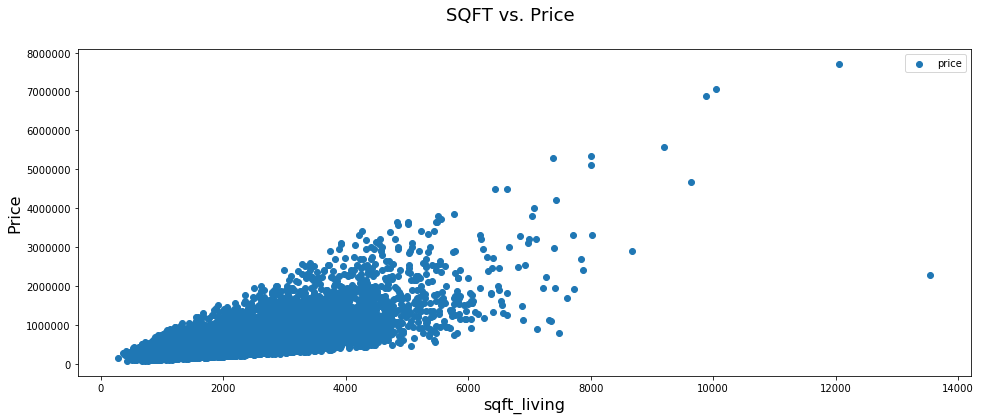

In [5]:
#Scatter plot
fig = plt.figure(figsize=(16, 6))
plt.scatter(x=sales["sqft_living"], y=sales["price"])
fig.suptitle(('SQFT vs. Price'), fontsize=18)
plt.xlabel('sqft_living', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(loc='best')
plt.show()

### Model with single feature

In [6]:
feature_cols = ["sqft_living"]
X = sales[feature_cols]
y = sales[["price"]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print("Total Observations: {}".format(sales.shape))
print("X_train Observations: {}".format(X_train.shape))
print("X_test Observations: {}".format(X_test.shape))
print("y_train Observations: {}".format(y_train.shape))
print("y_test Observations: {}".format(y_test.shape))


Total Observations: (21613, 21)
X_train Observations: (17290, 1)
X_test Observations: (4323, 1)
y_train Observations: (17290, 1)
y_test Observations: (4323, 1)


In [26]:
simple_regression_model = LinearRegression()
simple_regression_model.fit(X_train, y_train)
simple_regression_model.score(X_train, y_train)


0.51112560781494065

In [9]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, simple_regression_model.coef_[0][idx]))


The coefficient for sqft_living is 273.821810173


In [10]:
intercept = simple_regression_model.intercept_
print("The intercept for our model is {}".format(intercept))


The intercept for our model is [-30186.35851473]


In [11]:
print("y mean: {}".format(y.mean()))
print("simple_regression_model score: {}".format(simple_regression_model.score(X_test, y_test)))


y mean: price    540088.141905
dtype: float64
simple_regression_model score: 0.503301901425


In [12]:
y_predict = simple_regression_model.predict(X_test)
simple_mse = mean_squared_error(y_predict, y_test)
print("simple_mse: {}".format(simple_mse))
simple_rmse = math.sqrt(simple_mse)
print("simple_rmse: {}".format(simple_rmse))


simple_mse: 85730572791.3
simple_rmse: 292797.836043


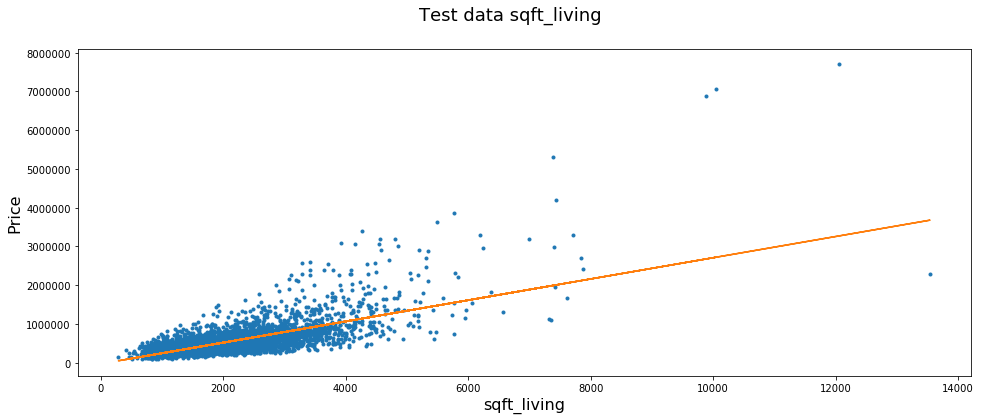

In [13]:
fig = plt.figure(figsize=(16, 6))
plt.plot(X_test['sqft_living'], y_test, '.', X_test['sqft_living'], y_predict, '-')
fig.suptitle(('Test data sqft_living'), fontsize=18)
plt.xlabel('sqft_living', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.show()


In [14]:
house1 = sales.loc[sales['id'].isin(["5309101200"])]
display(house1)
print("house1 price: {}".format(house1['price'].values[0]))
house1_X_1 = list(house1[feature_cols].values[0])
print("house1 feature {}: {}".format(feature_cols, house1_X_1))


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,2014-06-05,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


house1 price: 620000
house1 feature ['sqft_living']: [2400]


### Model with multiple features

In [15]:
# Multiple features
feature_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
print(sales[feature_cols].describe())


           bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21613.000000  21613.000000  21613.000000  2.161300e+04  21613.000000   
mean       3.370842      2.114757   2079.899736  1.510697e+04      1.494309   
std        0.930062      0.770163    918.440897  4.142051e+04      0.539989   
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1427.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.068800e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

            zipcode  
count  21613.000000  
mean   98077.939805  
std       53.505026  
min    98001.000000  
25%    98033.000000  
50%    98065.000000  
75%    98118.000000  
max    98199.000000  


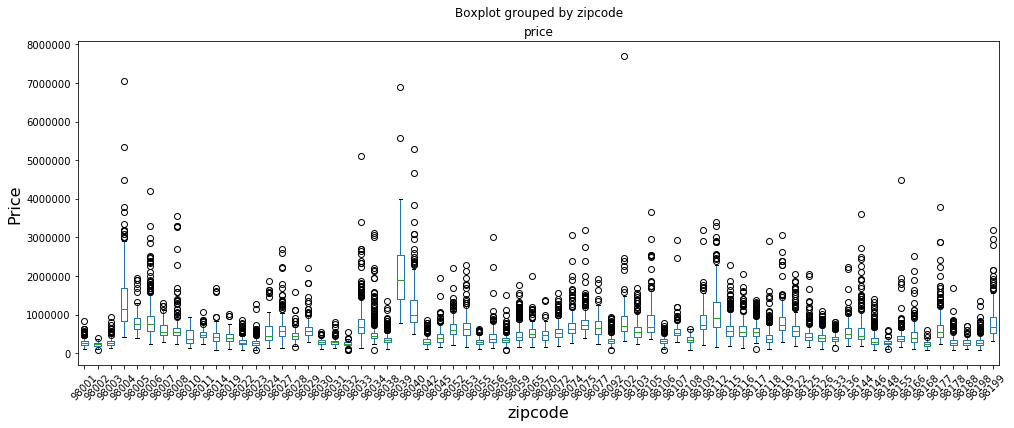

In [16]:
# Box plot with matplotlib
fig = plt.figure()
sales.boxplot(by='zipcode', column=['price'], figsize=(16, 6), grid=False)
plt.xlabel('zipcode', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Price', fontsize=16)
plt.show()


In [17]:
X = sales[feature_cols]
y = sales[["price"]]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print("Total Observations: {}".format(sales.shape))
print("X_train Observations: {}".format(X_train.shape))
print("X_test Observations: {}".format(X_test.shape))
print("y_train Observations: {}".format(y_train.shape))
print("y_test Observations: {}".format(y_test.shape))


Total Observations: (21613, 21)
X_train Observations: (17290, 6)
X_test Observations: (4323, 6)
y_train Observations: (17290, 1)
y_test Observations: (4323, 1)


In [19]:
featured_regression_model = LinearRegression()
featured_regression_model.fit(X_train, y_train)
featured_regression_model.score(X_train, y_train)


0.51112560781494065

In [20]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, featured_regression_model.coef_[0][idx]))


The coefficient for bedrooms is -53733.7668291
The coefficient for bathrooms is 9442.00976888
The coefficient for sqft_living is 308.769115165
The coefficient for sqft_lot is -0.259689041472
The coefficient for floors is -122.379357009
The coefficient for zipcode is 583.446540028


In [21]:
intercept = featured_regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))


The intercept for our model is -57160903.2731


In [22]:
print("y mean: {}".format(y.mean()))
print(featured_regression_model.score(X_test, y_test))


y mean: price    540088.141905
dtype: float64
0.525078382362


In [23]:
y_predict = featured_regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
print("regression_model_mse: {}".format(regression_model_mse))
rmse = math.sqrt(regression_model_mse)
print("rmse: {}".format(rmse))


regression_model_mse: 81971931094.4
rmse: 286307.406636


/Users/tpanchal/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


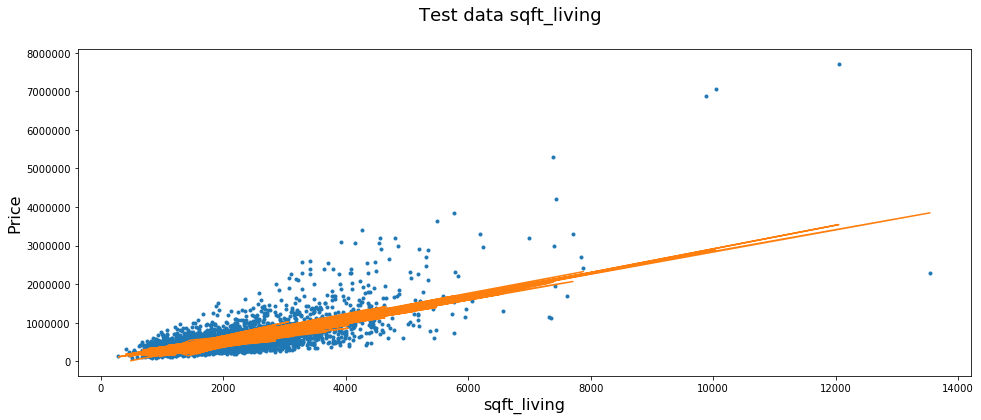

In [24]:
fig = plt.figure(figsize=(16, 6))
plt.plot(X_test['sqft_living'], y_test, '.', X_test['sqft_living'], y_predict, '-')
fig.suptitle(('Test data sqft_living'), fontsize=18)
plt.xlabel('sqft_living', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(loc='best')
plt.show()


In [25]:
house1 = sales.loc[sales['id'].isin(["5309101200"])]
display(house1)
print("house1 price: {}".format(house1['price'].values[0]))
house1_X = list(house1[feature_cols].values[0])
print("house1 feature data: {}".format(house1_X))
print("house1 simple Predict: {}".format(simple_regression_model.predict([house1_X_1])))
print("house1 with feature Predict: {}".format(featured_regression_model.predict([house1_X])))


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,2014-06-05,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


house1 price: 620000
house1 feature data: [4.0, 2.25, 2400.0, 5350.0, 1.5, 98117.0]
house1 simple Predict: [[ 626985.98590072]]
house1 with feature Predict: [[ 630903.32041934]]
